In [1]:
from keras.datasets import imdb
from tensorflow.keras import models, layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# [4월 6일]
---

## # 과대적합(overfitting)과 과소적합(underfitting)
---

세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.
$$$$

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension = 10000):

    # 크기가 (len(sequences, dimension))이고 모든 원소가 0인 행렬 만들기
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        # results[i]에서 특정 인덱스의 위치를 1로 만들기
        results[i, sequence] = 1.
    
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

# 테스트 데이터 검증
results = model.evaluate(x_test, y_test)
print(results)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 40ms/step - loss: 0.5252 - accuracy: 0.7729 - val_loss: 0.3897 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3099 - accuracy: 0.9003 - val_loss: 0.3359 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2278 - accuracy: 0.9233 - val_loss: 0.2833 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1779 - accuracy: 0.9426 - val_loss: 0.2763 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1475 - accuracy: 0.9503 - val_loss: 0.2816 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1199 - accuracy: 0.9636 - val_loss: 0.3101 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0990 - accurac

In [3]:
history.history['val_loss']

[0.3896767199039459,
 0.335910826921463,
 0.2833385169506073,
 0.27631139755249023,
 0.28158262372016907,
 0.3100547790527344,
 0.30648139119148254,
 0.34154564142227173,
 0.36535051465034485,
 0.3761432468891144,
 0.4203653335571289,
 0.4646461009979248,
 0.4654006361961365,
 0.494060754776001,
 0.5286136269569397,
 0.5587040185928345,
 0.6805355548858643,
 0.6973376274108887,
 0.659972608089447,
 0.6974535584449768]

### # 네트워크 크기 변경
---

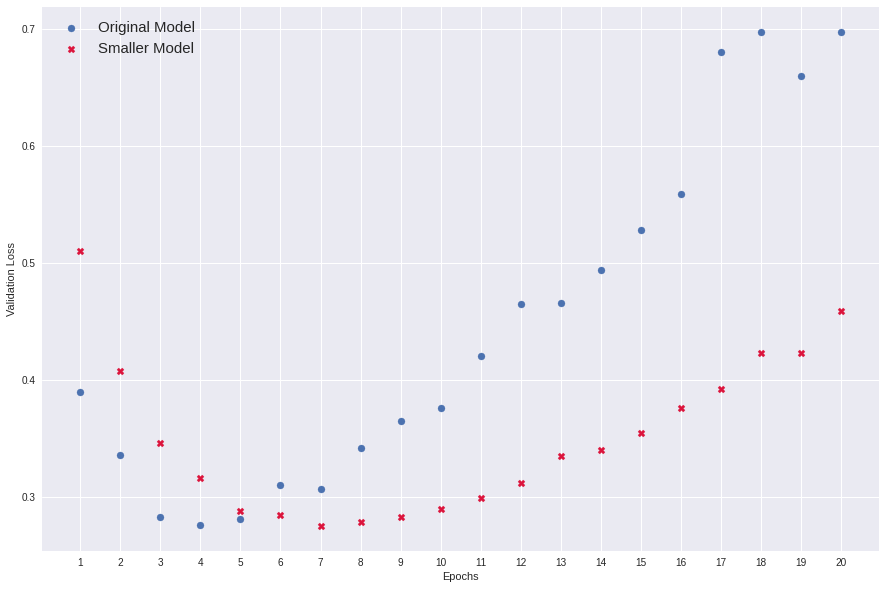

In [4]:
# 작은 용량의 모델과 비교 시각화
# 기본 네트워크보다 더 나중에 과대적합되기 시작

model = models.Sequential()
model.add(layers.Dense(6, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_6 = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.scatter(x = range(1, epochs + 1), y = history.history['val_loss'], label = 'Original Model')
plt.scatter(x = range(1, epochs + 1), y = history_6.history['val_loss'], color = 'crimson', marker = 'X', label = 'Smaller Model')
plt.xlabel('Epochs')
plt.xticks(range(1, epochs+1))
plt.ylabel('Validation Loss')
plt.legend(fontsize = 15)
plt.show()

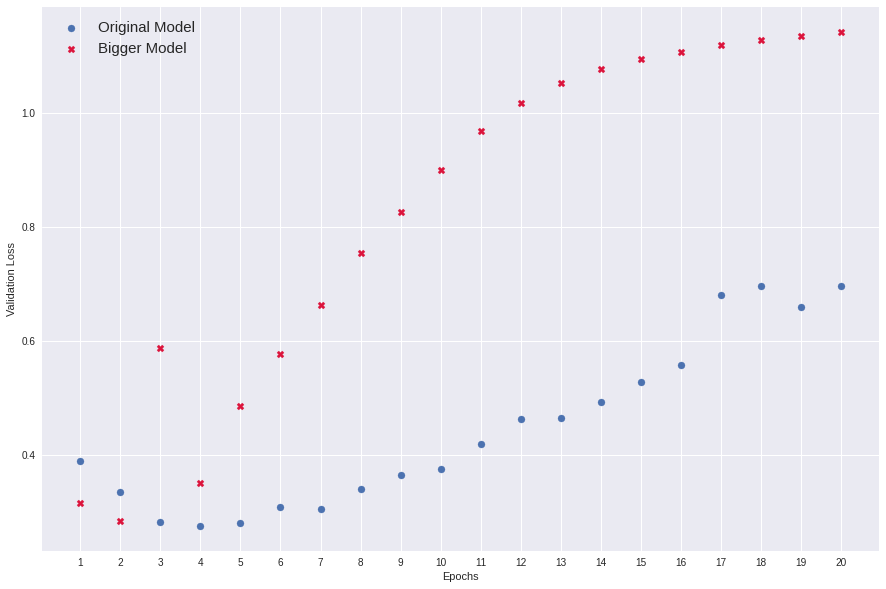

In [5]:
# 큰 용량의 모델과 비교 시각화
# 첫번째 에포크 이후 바로 과대적합이 시작

model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_1024 = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.scatter(x = range(1, epochs + 1), y = history.history['val_loss'], label = 'Original Model')
plt.scatter(x = range(1, epochs + 1), y = history_1024.history['val_loss'], color = 'crimson', marker = 'X', label = 'Bigger Model')
plt.xlabel('Epochs')
plt.xticks(range(1, epochs+1))
plt.ylabel('Validation Loss')
plt.legend(fontsize = 15)
plt.show()

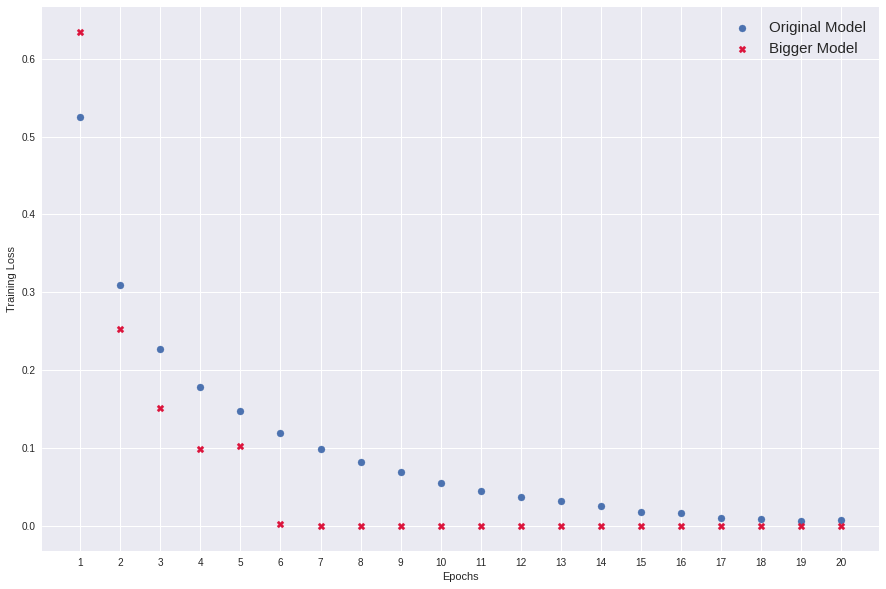

In [6]:
# 큰 용량의 모델과 비교 시각화 (훈련 데이터)
# 훈련 손실이 매우 빠르게 감소
# 용량이 클 수록 더 빠르게 훈련데이터를 모델링 할 수 있으나 과대적합에 민감해진다.

model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_1024 = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.scatter(x = range(1, epochs + 1), y = history.history['loss'], label = 'Original Model')
plt.scatter(x = range(1, epochs + 1), y = history_1024.history['loss'], color = 'crimson', marker = 'X', label = 'Bigger Model')
plt.xlabel('Epochs')
plt.xticks(range(1, epochs+1))
plt.ylabel('Training Loss')
plt.legend(fontsize = 15)
plt.show()

### # 가중치 규제
---

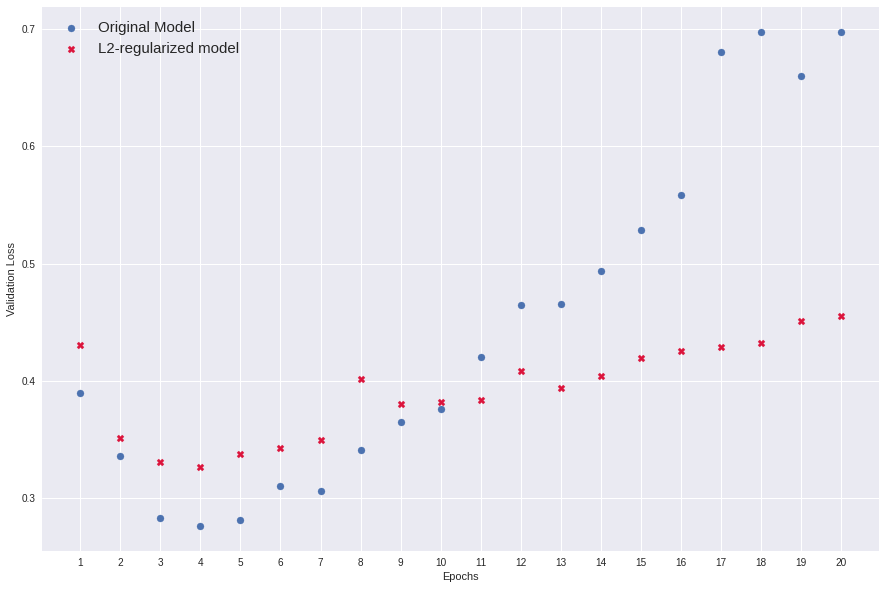

In [7]:
# 모델에 L2 규제 추가
# 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 훨씬 더 과대적합이 덜 발생한다

from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,),
                       kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(16, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_l2 = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.scatter(x = range(1, epochs + 1), y = history.history['val_loss'], label = 'Original Model')
plt.scatter(x = range(1, epochs + 1), y = history_l2.history['val_loss'], color = 'crimson', marker = 'X', label = 'L2-regularized model')
plt.xlabel('Epochs')
plt.xticks(range(1, epochs+1))
plt.ylabel('Validation Loss')
plt.legend(fontsize = 15)
plt.show()

In [8]:
regularizers.l1(0.001) # L1규제
regularizers.l1_l2(l1 = 0.001, l2 = 0.001) # L1과 L2 규제 병행